C:\Users\edupr\AppData\Local\Temp\ipykernel_24536\2116560562.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(arquivo, delim_whitespace=True, header=None, dtype=str)
C:\Users\edupr\AppData\Local\Temp\ipykernel_24536\2116560562.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(arquivo, delim_whitespace=True, header=None, dtype=str)
C:\Users\edupr\AppData\Local\Temp\ipykernel_24536\2116560562.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(arquivo, delim_whitespace=True, header=None, dtype=str)
C:\Users\edupr\AppData\Local\Temp\ipykernel_24536\2116560562.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated an

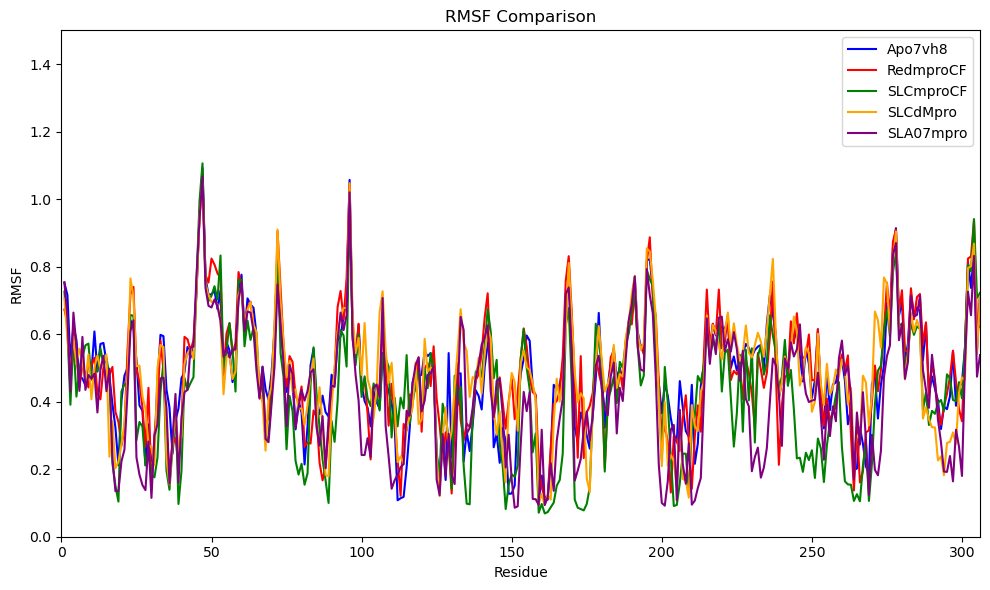

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista de arquivos e nomes
arquivos = [
    (r"C:\Users\edupr\Downloads\PAPERIQ\CF3\Apo7vh8\plots\RMSF1.csv", "Apo7vh8"),
    (r"C:\Users\edupr\Downloads\PAPERIQ\CF3\RedmproCF\plots\RMSF2.csv", "RedmproCF"),
    (r"C:\Users\edupr\Downloads\PAPERIQ\CF3\SLCmproCF\plots\RMSF3.csv", "SLCmproCF"),
    (r"C:\Users\edupr\Downloads\PAPERIQ\CF3\SLCdMpro\plots\RMSF4.csv", "SLCdMpro"),
    (r"C:\Users\edupr\Downloads\PAPERIQ\CF3\SLA07mpro\plots\RMSF5.csv", "SLA07mpro")
]

# Paleta de cores
cores = ['blue', 'red', 'green', 'orange', 'purple']

plt.figure(figsize=(10, 6))

for i, (arquivo, nome) in enumerate(arquivos):
    # Tenta ler separando por espaços/tabs
    df = pd.read_csv(arquivo, delim_whitespace=True, header=None, dtype=str)
    
    # Junta as duas primeiras colunas se for formato A10.754
    if df.shape[1] == 1:  
        # ainda não separou, força split no ponto
        df[['Residue', 'RMSF']] = df[0].str.split('.', n=1, expand=True)
    else:
        # se já tem duas colunas, assume que são Residue e RMSF
        df.columns = ['Residue', 'RMSF']
    
    # Remove letras e mantém só números
    df['Residue'] = df['Residue'].str.replace(r'\D', '', regex=True)
    df['RMSF'] = df['RMSF'].str.replace(r'[^0-9\.\-]', '', regex=True)
    
    # Converte para número
    df['Residue'] = pd.to_numeric(df['Residue'], errors='coerce')
    df['RMSF'] = pd.to_numeric(df['RMSF'], errors='coerce')
    
    # Remove linhas inválidas
    df = df.dropna(subset=['Residue', 'RMSF'])
    
    # Plota
    plt.plot(df['Residue'], df['RMSF'],
             label=nome,
             color=cores[i],
             linestyle='-',
             linewidth=1.5)

# Configurações do gráfico
plt.xlabel('Residue')
plt.ylabel('RMSF')
plt.title('RMSF Comparison')
plt.legend()
plt.xlim(0, 306)
plt.ylim(0.0, 1.5)

plt.tight_layout()

# Salvar em SVG
plt.savefig("RMSF_comparisonVF1.svg", format='svg')

# Mostrar na tela
plt.show()


Análise 1: n_frames=1000  frame_range=(0, 999)  RMSD_range=(0.666, 0.925)
Análise 2: n_frames=1000  frame_range=(0, 999)  RMSD_range=(0.636, 0.900)
Análise 3: n_frames=1000  frame_range=(0, 999)  RMSD_range=(0.639, 0.947)
Análise 4: n_frames=1000  frame_range=(0, 999)  RMSD_range=(0.669, 0.893)
Análise 5: n_frames=1000  frame_range=(0, 999)  RMSD_range=(0.665, 0.930)
Arquivos escritos: C:\Users\edupr\rmsd_overlay_5analysesvf1_interval.png  (tamanho: 1226883 bytes)
                  C:\Users\edupr\rmsd_overlay_5analysesvf1_interval.svg  (tamanho: 153837 bytes)


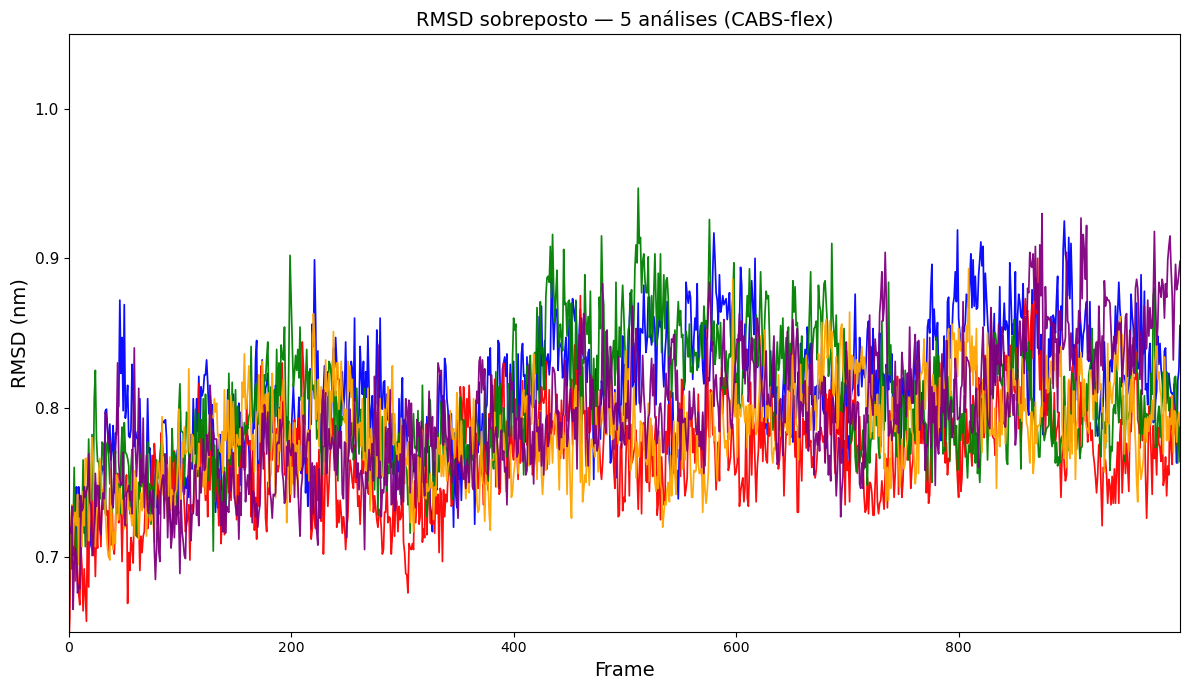

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Versão corrigida do seu script com Y-axis padronizado:
- usa fig, ax
- cores fixas (blue, red, green, orange, purple)
- salva via fig.savefig() ANTES do plt.show()
- fixa o eixo Y para 0.65-1.05 e ticks 0.7,0.8,0.9,1.0 (somente essas linhas foram adicionadas)
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

def load_rmsd_frame(path):
    """Lê arquivo RMSD por frame tentando detectar separador."""
    for sep in ['\t', ',', r'\s+']:
        try:
            df = pd.read_csv(path, sep=sep, header=None, engine='python')
            if df.shape[1] >= 2:
                df = df.iloc[:, :2].copy()
                df.columns = ['Frame', 'RMSD']
                df['Frame'] = pd.to_numeric(df['Frame'], errors='coerce')
                df['RMSD'] = pd.to_numeric(df['RMSD'], errors='coerce')
                return df.dropna().reset_index(drop=True)
        except Exception:
            pass
    # fallback simples
    with open(path, 'r', encoding='utf-8') as f:
        rows = []
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 2:
                rows.append(parts[:2])
    df = pd.DataFrame(rows, columns=['Frame','RMSD']).astype(float)
    return df

def load_total(path):
    """Lê arquivo E_RMSD_A_total.csv (retorna coluna RMSD)."""
    for sep in ['\t', ',', r'\s+']:
        try:
            df = pd.read_csv(path, sep=sep, header=None, engine='python')
            if df.shape[1] >= 1:
                if df.shape[1] >= 2:
                    df = df.iloc[:, :2].copy()
                    df.columns = ['RMSD','Energy']
                else:
                    df.columns = ['RMSD']
                df['RMSD'] = pd.to_numeric(df['RMSD'], errors='coerce')
                return df.dropna().reset_index(drop=True)
        except Exception:
            pass
    # fallback
    with open(path, 'r', encoding='utf-8') as f:
        rows = [line.strip().split() for line in f if line.strip()]
    df = pd.DataFrame(rows).astype(float)
    if df.shape[1] >= 2:
        df = df.iloc[:, :2]; df.columns=['RMSD','Energy']
    else:
        df.columns=['RMSD']
    return df

# -------------------------
# Substitua pelos seus caminhos
# -------------------------
analyses = [
    (r"C:\Users\edupr\Downloads\PAPERIQ\CF3\Apo7vh8\plots\RMSD_frame_A_replica_1.csv",
     r"C:\Users\edupr\Downloads\PAPERIQ\CF3\Apo7vh8\plots\E_RMSD_A_total1.csv", "Análise 1"),
    (r"C:\Users\edupr\Downloads\PAPERIQ\CF3\RedmproCF\plots\RMSD_frame_A_replica_02.csv",
     r"C:\Users\edupr\Downloads\PAPERIQ\CF3\RedmproCF\plots\E_RMSD_A_total2.csv", "Análise 2"),
    (r"C:\Users\edupr\Downloads\PAPERIQ\CF3\SLCmproCF\plots\RMSD_frame_A_replica_03.csv",
     r"C:\Users\edupr\Downloads\PAPERIQ\CF3\SLCmproCF\plots\E_RMSD_A_total3.csv", "Análise 3"),
    (r"C:\Users\edupr\Downloads\PAPERIQ\CF3\SLCdMpro\plots\RMSD_frame_A_replica_04.csv",
     r"C:\Users\edupr\Downloads\PAPERIQ\CF3\SLCdMpro\plots\E_RMSD_A_total4.csv", "Análise 4"),
    (r"C:\Users\edupr\Downloads\PAPERIQ\CF3\SLA07mpro\plots\RMSD_frame_A_replica_05.csv",
     r"C:\Users\edupr\Downloads\PAPERIQ\CF3\SLA07mpro\plots\E_RMSD_A_total5.csv", "Análise 5"),
]

# cores fixas
colors = ['blue', 'red', 'green', 'orange', 'purple']

# checagem de existência dos arquivos
for f_frame, f_total, label in analyses:
    p1 = Path(f_frame)
    p2 = Path(f_total)
    if not p1.exists():
        print(f"[AVISO] frame não encontrado: {p1}")
    if not p2.exists():
        print(f"[AVISO] total não encontrado: {p2}")

# cria figura/axes explicitamente
fig, ax = plt.subplots(figsize=(12,7))
all_frames_min = np.inf
all_frames_max = -np.inf
ymins, ymaxs = [], []

for i, (f_frame, f_total, label) in enumerate(analyses):
    try:
        df_frame = load_rmsd_frame(f_frame)
        df_total = load_total(f_total)
    except Exception as e:
        print(f"Erro ao ler {label}: {e}")
        continue

    if df_frame.empty:
        print(f"[AVISO] {label} -> df_frame vazio, pulando.")
        continue

    # debug prints
    print(f"{label}: n_frames={len(df_frame)}  frame_range=({df_frame['Frame'].min()}, {df_frame['Frame'].max()})  RMSD_range=({df_frame['RMSD'].min():.3f}, {df_frame['RMSD'].max():.3f})")

    color = colors[i % len(colors)]
    ax.plot(df_frame['Frame'], df_frame['RMSD'], linewidth=1.25, alpha=0.95, color=color)

    all_frames_min = min(all_frames_min, df_frame['Frame'].min())
    all_frames_max = max(all_frames_max, df_frame['Frame'].max())
    ymins.append(df_frame['RMSD'].min()); ymaxs.append(df_frame['RMSD'].max())

ax.set_xlabel("Frame", fontsize=14)
ax.set_ylabel("RMSD (nm)", fontsize=14)
ax.set_title("RMSD sobreposto — 5 análises (CABS-flex)", fontsize=14)

# ---------- AQUI são as 3 linhas adicionadas para padronizar o eixo Y ----------
ax.set_ylim(0.65, 1.05)                                # mesmo intervalo vertical da sua imagem
ax.set_yticks(np.arange(0.7, 1.01, 0.1))              # ticks em 0.7,0.8,0.9,1.0
ax.set_yticklabels([f"{t:.1f}" for t in np.arange(0.7, 1.01, 0.1)], fontsize=11)
# -------------------------------------------------------------------------

# manter limites X automáticos (ou fixe se quiser)
if all_frames_min < all_frames_max:
    ax.set_xlim(all_frames_min, all_frames_max)

fig.tight_layout()

out_svg = Path("rmsd_overlay_5analysesvf1_interval.svg")
out_png = Path("rmsd_overlay_5analysesvf1_interval.png")

# salva via fig.savefig() ANTES do show
fig.savefig(out_png, dpi=300, bbox_inches="tight")
fig.savefig(out_svg, dpi=300, bbox_inches="tight")

print(f"Arquivos escritos: {out_png.resolve()}  (tamanho: {out_png.stat().st_size} bytes)")
print(f"                  {out_svg.resolve()}  (tamanho: {out_svg.stat().st_size} bytes)")

# mostra no notebook
plt.show()

# fecha a figura explicitamente
plt.close(fig)

In [3]:
# ============================
# Apo vs 4 Experimentos — SOMENTE ΔSASA, ΔRMSF e SCORE COMBINADO
# ============================

# === CONFIG ===
APO_PDB = r"C:\Users\edupr\Downloads\PAPERIQ\CF3\Apo7vh8\output_pdbs\trajectories\replica0.pdb"
EXP_PDBS = [
    r"C:\Users\edupr\Downloads\PAPERIQ\CF3\modvector\replica1.pdb",
    r"C:\Users\edupr\Downloads\PAPERIQ\CF3\modvector\replica2.pdb",
    r"C:\Users\edupr\Downloads\PAPERIQ\CF3\modvector\replica3.pdb",
    r"C:\Users\edupr\Downloads\PAPERIQ\CF3\modvector\replica4.pdb",
]
EXP_LABELS = ["experimental1", "experimental2", "experimental3", "experimental4"]
EXP_COLORS = ["red", "green", "orange", "purple"]  # cores pedidas
OUTDIR  = "./out_conf_change_multi"
SEL_ALIGN = "protein and name CA"
SAVE_FMT = "svg"; DPI = 220
TOPN_TOPRES = 10          # Top-N por experimento

# === IMPORTS ===
import os, numpy as np, pandas as pd
import mdtraj as md
import matplotlib as mpl
import matplotlib.pyplot as plt

os.makedirs(OUTDIR, exist_ok=True)
mpl.rcParams['svg.fonttype'] = 'none'   # texto editável no SVG

def log(m): print(f"[INFO] {m}")

# === Utilitários ===
def superpose_to_first(traj, sel="protein and name CA"):
    ref = traj[0]
    ids = traj.topology.select(sel)
    if ids is None or len(ids)==0:
        raise ValueError("Seleção de alinhamento não encontrou átomos.")
    return traj.superpose(ref, atom_indices=ids, ref_atom_indices=ids)

def rmsf_by_residue_ca(traj):
    ca_idx = traj.topology.select("protein and name CA")
    if ca_idx is None or len(ca_idx)==0:
        raise ValueError("Sem Cα na seleção.")
    rmsf_ca = md.rmsf(traj, traj[0], atom_indices=ca_idx)  # [N_CA]
    ca_to_res = [traj.topology.atom(i).residue.index for i in ca_idx]
    out = np.full(traj.topology.n_residues, np.nan, dtype=float)
    for val, r in zip(rmsf_ca, ca_to_res): out[r] = val
    return out

def sasa_by_residue(traj):
    # md.shrake_rupley retorna nm^2
    sasa_atom = md.shrake_rupley(traj, mode='atom')   # [T, Natoms]
    res_sasa = np.zeros((traj.n_frames, traj.topology.n_residues), dtype=float)
    for atom in traj.topology.atoms:
        res_sasa[:, atom.residue.index] += sasa_atom[:, atom.index]
    return res_sasa.mean(axis=0)

def robust_z(x):
    x = np.asarray(x, float)
    if np.all(np.isnan(x)): return np.full_like(x, np.nan)
    m = np.nanmedian(x); mad = np.nanmedian(np.abs(x - m))
    if not np.isfinite(mad) or mad == 0:
        sd = np.nanstd(x); return (x - m) / (sd if sd>0 else 1.0)
    return (x - m) / (1.4826*mad)

# === Carregar e alinhar APO ===
log("Carregando apo..."); t_apo = md.load(APO_PDB)
log("Alinhando apo...");  t_apo = superpose_to_first(t_apo, SEL_ALIGN)
top = t_apo.topology
res_list  = list(top.residues)
res_ids   = [r.resSeq for r in res_list]
res_names = [r.name  for r in res_list]
res_index = pd.Index([f"{rn}{ri}" for rn,ri in zip(res_names,res_ids)], name="residue")

# === Métricas do APO (base) ===
log("RMSF (apo)...");  rmsf_apo = rmsf_by_residue_ca(t_apo)
log("SASA (apo)...");  sasa_apo = sasa_by_residue(t_apo)

# === Loop pelos 4 experimentos ===
results = {"dRMSF": {}, "dSASA": {}, "score_combined": {}}

for label, path, color in zip(EXP_LABELS, EXP_PDBS, EXP_COLORS):
    log(f"Carregando {label}..."); t_exp = md.load(path)
    assert t_exp.topology.n_residues == top.n_residues, f"{label}: nº de resíduos difere do APO."
    assert t_exp.topology.n_atoms == top.n_atoms,       f"{label}: nº de átomos difere do APO."
    log(f"Alinhando {label}..."); t_exp = superpose_to_first(t_exp, SEL_ALIGN)

    # ΔRMSF e ΔSASA
    log(f"RMSF ({label})..."); rmsf_exp = rmsf_by_residue_ca(t_exp)
    log(f"SASA ({label})..."); sasa_exp = sasa_by_residue(t_exp)

    dRMSF = rmsf_exp - rmsf_apo             # Å
    dSASA = sasa_exp - sasa_apo             # nm^2

    results["dRMSF"][label] = dRMSF
    results["dSASA"][label] = dSASA

    # score combinado = média dos z-scores robustos de ΔRMSF e ΔSASA
    s1 = robust_z(dRMSF)
    s2 = robust_z(dSASA)
    score = np.nanmean(np.vstack([s1, s2]), axis=0)
    results["score_combined"][label] = score

# === Salvar CSVs (índice = resíduos; colunas = experimentos) ===
def save_combined_csv(metric_name, data_dict):
    df = pd.DataFrame({lab: vals for lab, vals in data_dict.items()}, index=res_index)
    df.to_csv(os.path.join(OUTDIR, f"{metric_name}_combined.csv"))
    return df

df_dRMSF = save_combined_csv("dRMSF", results["dRMSF"])
df_dSASA = save_combined_csv("dSASA", results["dSASA"])
df_score = save_combined_csv("score_combined", results["score_combined"])

# === Gráficos overlay (ΔRMSF e ΔSASA) ===
def plot_overlay(df, title, ylabel, fname, colors):
    plt.figure(figsize=(11,3.2))
    for lab, col in zip(df.columns, colors):
        plt.plot(df[lab].values, label=f"apo vs {lab}", color=col, linewidth=1.6)
    plt.axhline(0, linewidth=1, color="black", alpha=0.5)
    plt.xlabel("resíduo (ordem na cadeia)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(frameon=False, ncol=4, fontsize=9)
    plt.tight_layout()
    plt.savefig(os.path.join(OUTDIR, f"{fname}.{SAVE_FMT}"), format=SAVE_FMT, dpi=DPI)
    plt.close()

plot_overlay(df_dRMSF, "ΔRMSF por resíduo (experimental – apo)", "ΔRMSF (Å)", "overlay_dRMSF", EXP_COLORS)
plot_overlay(df_dSASA, "ΔSASA por resíduo (experimental – apo)", "ΔSASA (nm²)", "overlay_dSASA", EXP_COLORS)

# === Top-10 por experimento (com base no score combinado) ===
for lab, col in zip(EXP_LABELS, EXP_COLORS):
    scores = df_score[lab].values
    idx_sorted = np.argsort(scores)[::-1]  # descendente
    idx_top = [i for i in idx_sorted if np.isfinite(scores[i])][:TOPN_TOPRES]
    if len(idx_top) == 0:
        log(f"{lab}: nenhum score finito para Top-N."); 
        continue
    residues = [res_index[i] for i in idx_top]
    vals = [scores[i] for i in idx_top]

    # CSV Top-10
    pd.DataFrame({"residue": residues, "score_combined": vals}).to_csv(
        os.path.join(OUTDIR, f"top{TOPN_TOPRES}_{lab}.csv"), index=False
    )

    # gráfico Top-10
    plt.figure(figsize=(max(8, 0.7*len(residues)), 3.8))
    plt.bar(range(len(residues)), vals, color=col)
    plt.xticks(range(len(residues)), residues, rotation=90)
    plt.ylabel("score combinado (z-médio de ΔRMSF & ΔSASA)")
    plt.title(f"Top {TOPN_TOPRES} resíduos alterados — apo vs {lab}")
    plt.tight_layout()
    plt.savefig(os.path.join(OUTDIR, f"top{TOPN_TOPRES}_{lab}.{SAVE_FMT}"), format=SAVE_FMT, dpi=DPI)
    plt.close()

print("[DONE] CSVs e gráficos salvos em:", OUTDIR)


[INFO] Carregando apo...
[INFO] Alinhando apo...
[INFO] RMSF (apo)...
[INFO] SASA (apo)...
[INFO] Carregando experimental1...
[INFO] Alinhando experimental1...
[INFO] RMSF (experimental1)...
[INFO] SASA (experimental1)...
[INFO] Carregando experimental2...
[INFO] Alinhando experimental2...
[INFO] RMSF (experimental2)...
[INFO] SASA (experimental2)...
[INFO] Carregando experimental3...
[INFO] Alinhando experimental3...
[INFO] RMSF (experimental3)...
[INFO] SASA (experimental3)...
[INFO] Carregando experimental4...
[INFO] Alinhando experimental4...
[INFO] RMSF (experimental4)...
[INFO] SASA (experimental4)...
[DONE] CSVs e gráficos salvos em: ./out_conf_change_multi
